### Notebook 2_4

## Sine Input into System, Steady State Response Part

#### Student Learning Outcomes
* Learn the scipy plot of sine response
* Learn the steady state part of sine response of the system.

--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Scipy Plot of Sine Response</h2>
</div>

In the last class, we get such conclusion:

Given a sine input:
$$x(t)=A\sin(\omega t)$$
The system is first-order. The transfer function can be written as:
$$H(s)=\frac{b}{s+a}$$
The system output will be:
$$y(t) = \underbrace{\frac{A}{2j}\Bigl(\tfrac{b}{-a - j\omega} - \tfrac{b}{-a + j\omega}\Bigr)\,e^{-\,a t}}_{\text{Transient Response}}+\underbrace{\frac{A\,b}{\sqrt{a^{2}+\omega^{2}}}\sin\!\Bigl(\omega t - \tan^{-1}\!\bigl(\tfrac{\omega}{a}\bigr)\Bigr)}_{\text{Steady-State Response}}$$

We might run into difficulties with Python coding and verifying such looong expression in the last class.

In this task, we introduce a way to quick verify your sine response plot -- using ```scipy.signal.lsim``` in Scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html

-------------
You need to know 3 items:
* The input sine: set as the ```u``` in the second entry of ```scipy.signal.lsim```
* The transfer function: set as the ```Hs``` in the first entry of ```scipy.signal.lsim```
* The time to run: set as the ```t``` in the third entry of ```scipy.signal.lsim```
  
Then
```python
# input your transfer function
num = [...]
den = [...]
Hs = sig.lti(num, den)
# set up time axis and input
t = np.linspace(...)
u = ...*np.sin(...*t) 
# use lsim to get output
_, y, _ = sig.lsim(Hs, u, t)
```

-------
Now, it your time to practice it.

For such problem setting:

* $x(t)=4\sin(3 t)$
* $H(s)=\frac{5}{s+2}$

**Create a first figure**, show:
* $x(t)$
* $y(t)$ by coding the very long system output expression
* Time axis for 10 seconds

**Then Create a second figure**, show:
* $x(t)$
* $y(t)$ by using ```scipy.signal.lsim``` plot
* Time axis for 10 seconds

In [3]:
A = 4
w = 3
b = 5
a = 2
t = np.linspace(0, 10, 1000)
x = A*np.sin(w*t)


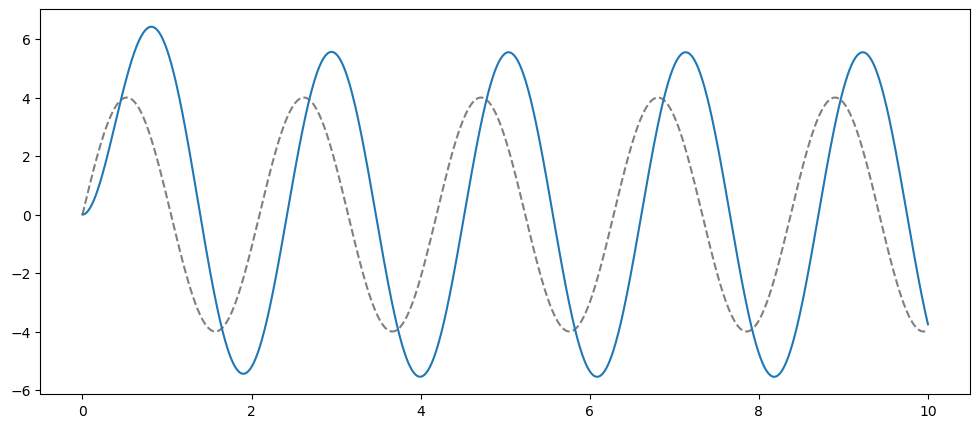

In [6]:
## My First Figure
y_transient = A/(2j)*(b/(-a-1j*w)-b/(-a+1j*w))*np.exp(-a*t)
y_steady = A*b/np.sqrt(a**2+w**2) * np.sin(w*t - np.arctan(w/a))
y_from_expression = y_transient + y_steady

plt.figure(figsize=(12, 5))
plt.plot(t, x, label="Input", color="gray", linestyle="--")
plt.plot(t, y_from_expression, label="Output", color="tab:blue")

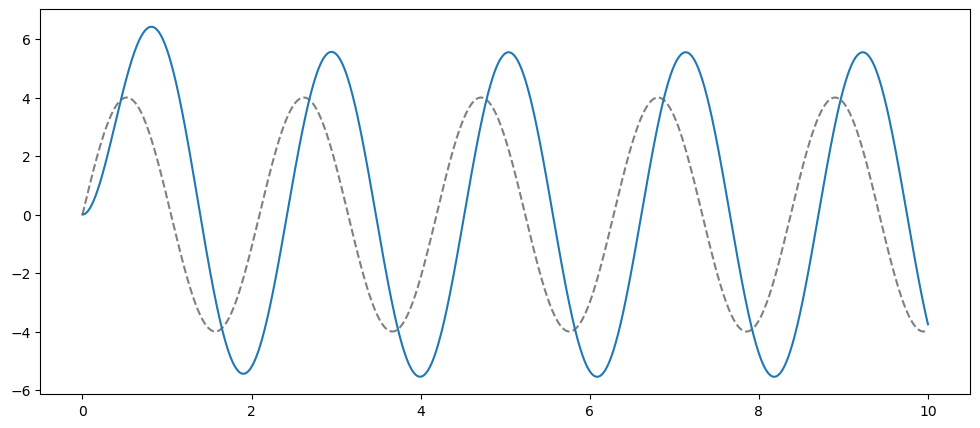

In [7]:
## My Second Figure
num = [5]
den = [1, 2]
H_s = sig.lti(num, den)
u = A*np.sin(w*t)
_,y_from_transfer_func,_ = sig.lsim(H_s, U=u, T=t)

plt.figure(figsize=(12, 5))
plt.plot(t, x, label="Input", color="gray", linestyle="--")
plt.plot(t, y_from_transfer_func, label="Output", color="tab:blue")

----------

After plotting, you should the these 2 figures are **the same everywhere**: Same Amplitude, Same Phase Shift.

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>2 Plots: 2x1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Steady State Response Expression</h2>
</div>

In the Notebook 2_3, Task 3, we have seen that:

For a sine input:
$$x(t)=A\sin(\omega t)$$

Goes into a first order system:
$$H(s)=\frac{b}{s+a}$$

The steady state response of the first order sine response is
$$\frac{A\,b}{\sqrt{a^{2}+\omega^{2}}}\sin\!\Bigl(\omega t - \tan^{-1}\!\bigl(\tfrac{\omega}{a}\bigr)\Bigr)$$

On the expression of steady state response:
* The Amplitude corresponds to the magnitude of the $\frac{b}{j\omega+a}$: $Mag=\left|\frac{b}{j\omega + a}\right| = \frac{\left|b\right|}{\left|j\omega + a\right|} = \frac{b}{\sqrt{a^2+\omega^2}}$
* The Phase shift corresponds to the angle of the $\frac{b}{j\omega+a}$: $Angle = \angle (\frac{b}{j\omega + a}) = = \angle b -\angle (j\omega + a) = 0 - \tan^{-1}(\frac{\omega}{a}) =-\tan^{-1}(\frac{\omega}{a})$

Finally you scale the amplitude by $A$.

-----------
If we continue to distill a little, the previous conclusion can be written as:

**For a sine input:**
$$x(t)=A\sin(\omega t)$$

**Goes into a first order system:**
$$H(s)=\frac{b}{s+a}$$

The **steady state of the output** can be expressed as:
$$y(t) =A \times Mag (H(j\omega)) \sin(\omega t+ Angle (H(j\omega))) $$

Or in a **simpler notation:**
$$y(t) =A \times |H(j\omega)| \sin(\omega t+ \angle (H(j\omega))) $$

---------
Note that the $\omega t$ in $x(t)$ and $y(t)$ are un-changed.

The output differs input only in Amplitude and Phase Shift.

--------
**Practice:**

* $x(t)=10\sin(5 t)$
* $H(s)=\frac{3}{s+0.5}$

Do such:
* Calculate $|H(j\omega)|$ and $\angle (H(j\omega))$.

* Then directly type down the expression of $y(t)$

* Plot two in 1 figure: your typed $y(t)$; the $y(t)$ using ```scipy.signal.lsim``` plot

(Note: Run for a longer time to see steady state, such as 20 sec, 30 sec, ...)

If everything is correct, your final 2 signals will overlap in steady state. You can then change one of them to dash line for better visualization.

In [8]:
## Answer to the Practice Problem
w_task2 = 5
## Replace s using jw
H_jw_task2 = 3/(1j*w_task2 + 0.5)

Mag_task2 = np.abs(H_jw_task2)
Angle_task2 = np.angle(H_jw_task2)
print(f"Mag = {Mag_task2}, Angle = {Angle_task2}")

Mag = 0.5970223141259935, Angle = -1.4711276743037345


In [10]:
## Scale Mag by input amplitude
Mag_task2 = Mag_task2*10
print(f"Final Mag = {Mag_task2}")

Final Mag = 5.970223141259935


$$y(t) = 5.970\sin(5t-1.471)$$

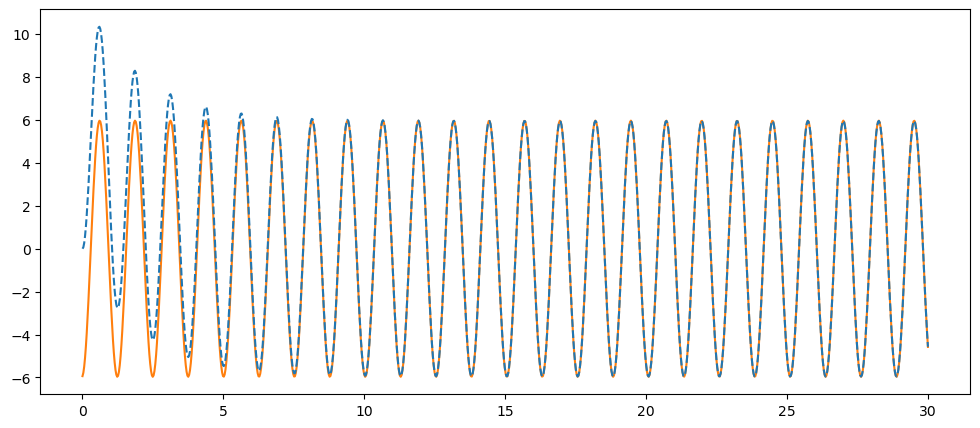

In [17]:
t_task2 = np.linspace(0, 30, 1000)

y_task2_myTyped = 5.970*np.sin(5*t_task2-1.471)

num_task2 = [3]
den_task2 = [1, 0.5]
H_s_task2 = sig.lti(num_task2, den_task2)
u_task2 = 10*np.sin(5*t_task2)
_,y_task2_from_transfer_func,_ = sig.lsim(H_s_task2, U=u_task2, T=t_task2)

plt.figure(figsize=(12, 5))
plt.plot(t_task2, y_task2_myTyped, label="Typed", color="tab:orange")
plt.plot(t_task2, y_task2_from_transfer_func, label="From Transfer Function", color="tab:blue", linestyle="--")

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Practice: 1.5 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Steady State Expression for Higher Order System</h2>
</div>

In fact, the previous conclusion not only works for the first order system, but also works for higher system.

For any order system, this holds:

**For a sine input:**
$$x(t)=A\sin(\omega t)$$

**Goes into a any order system:**
$$H(s)$$

The **steady state of the output** as:
$$y(t) =A \times |H(j\omega)| \sin(\omega t+ \angle (H(j\omega))) $$

The detailed derivation behind this conclusion may be too much for this course. We will not cover it. 

You just need to know this conclusion itself and how to use it to quickly calculate the steady state $y(t)$ for any order system.

Let's try on a 3rd order system here.

--------

**Practice:**

* $x(t)=8\sin(10 t)$
* $H(s)=\dfrac{s+5}{s^3+5s^2+3s+2}$

Do such:
* Calculate $|H(j\omega)|$ and $\angle (H(j\omega))$.

* Then directly type down the expression of $y(t)$

* Plot two in 1 figure: your typed $y(t)$; the $y(t)$ using ```scipy.signal.lsim``` plot

(Note 1: Run for a longer time to see steady state, such as 30 sec, 40 sec, ...)

(Note 2: power in Python is ```**``` or ```np.power```, not ```^```)

If everything is correct, your final 2 signals will overlap in steady state. You can then change one of them to dash line for better visualization.

In [18]:
## Answer to the Practice Problem
w_task3 = 10
jw_task3 = 1j*w_task3

## Replace s using jw
H_jw_task3 = (jw_task3+5)/(jw_task3**3+5*jw_task3**2+3*jw_task3+2)

Mag_task3 = np.abs(H_jw_task3)
Angle_task3 = np.angle(H_jw_task3)
print(f"Mag = {Mag_task3}, Angle = {Angle_task3}")

Mag = 0.010253723741725194, Angle = -3.130928578775355


In [19]:
## Scale Mag by input amplitude
Mag_task3 = Mag_task3*8
print(f"Final Mag = {Mag_task3}")

Final Mag = 0.08202978993380156


$$y(t) = 0.082\sin(10t-3.131)$$

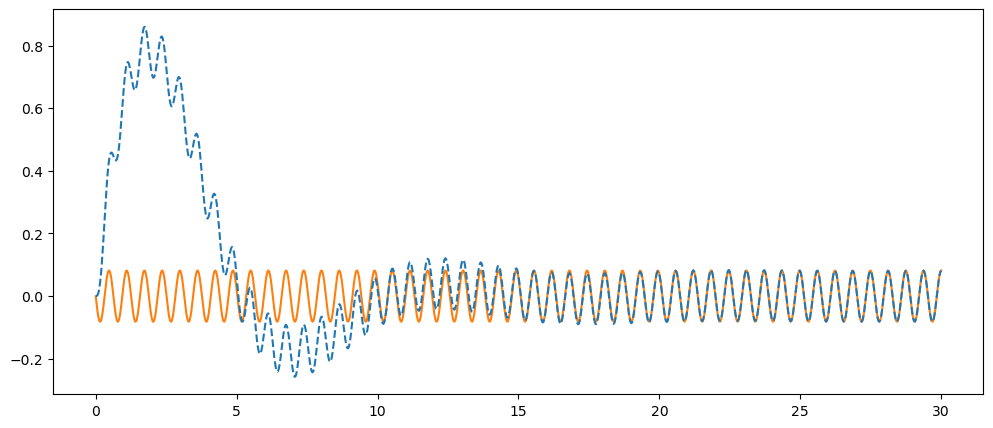

In [21]:
t_task3 = np.linspace(0, 30, 1000)

y_task3_myTyped = 0.082*np.sin(10*t_task3-3.131)

num_task3 = [1, 5]
den_task3 = [1, 5, 3, 2]
H_s_task3 = sig.lti(num_task3, den_task3)
u_task3 = 8*np.sin(10*t_task3)
_,y_task3_from_transfer_func,_ = sig.lsim(H_s_task3, U=u_task3, T=t_task3)

plt.figure(figsize=(12, 5))
plt.plot(t_task3, y_task3_myTyped, label="Typed", color="tab:orange")
plt.plot(t_task3, y_task3_from_transfer_func, label="From Transfer Function", color="tab:blue", linestyle="--")

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Practice: 1.5 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


